<a href="https://colab.research.google.com/github/Maliffikrifirdaus96/Handson_git/blob/main/THT_DS_MAFF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
!pip install pmdarima ta
import warnings
warnings.filterwarnings("ignore")

# Data Manipulation dan Analisis
import pandas as pd
import numpy as np
from datetime import date

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.preprocessing import MinMaxScaler
from ta import add_all_ta_features

# Modeling
from pmdarima import auto_arima # Untuk Auto ARIMA
from xgboost import XGBRegressor # Untuk XGBoost
from prophet import Prophet # Untuk Prophet
# The 'movingaverage' package could not be found, so its import has been removed.
# from movingaverage import SimpleMovingAverage, ExponentialMovingAverage

# Evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Read Dataset

In [ ]:
orders = pd.read_csv('/content/orders.csv')
order_items = pd.read_csv('/content/order_items.csv')
inventory_items = pd.read_csv('/content/inventory_items.csv')

In [ ]:
print("orders: ")
display(orders.head())
print("order_items: ")
display(order_items.head())
print("inventory_items: ")
display(inventory_items.head())

orders: 


,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3
1,60,44,Cancelled,F,2023-01-20 02:12:00+00:00,NaN,NaN,NaN,1
2,64,46,Cancelled,F,2021-12-06 09:11:00+00:00,NaN,NaN,NaN,1
3,89,65,Cancelled,F,2020-08-13 09:58:00+00:00,NaN,NaN,NaN,1
4,102,76,Cancelled,F,2023-01-17 08:17:00+00:00,NaN,NaN,NaN,2


order_items: 


,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaN,NaN,0.02
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaN,NaN,0.02


inventory_items: 


,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


## Data Understanding

In [ ]:
df = {
    "orders": orders,
    "order_items": order_items,
    "inventory_items": inventory_items
    }

for name, df_ in df.items():
  print(f"{name}: {df_.shape} rows, columns")

orders: (125226, 9) rows, columns
order_items: (181759, 11) rows, columns
inventory_items: (490705, 12) rows, columns


In [ ]:
for name, df_ in df.items():
  print(f"{name}: duplicate rows: {df_.duplicated().sum()}")

orders: duplicate rows: 0
order_items: duplicate rows: 0
inventory_items: duplicate rows: 0


In [ ]:
for name, df_ in df.items():
  print(f"{name}: missing values: {df_.isnull().sum()}")

orders: missing values: order_id             0
user_id              0
status               0
gender               0
created_at           0
returned_at     112696
shipped_at       43765
delivered_at     81342
num_of_item          0
dtype: int64
order_items: missing values: id                        0
order_id                  0
user_id                   0
product_id                0
inventory_item_id         0
status                    0
created_at                0
shipped_at            63478
delivered_at         117918
returned_at          163527
sale_price                0
dtype: int64
inventory_items: missing values: id                                     0
product_id                             0
created_at                             0
sold_at                           308946
cost                                   0
product_category                       0
product_name                          29
product_brand                        401
product_retail_price                   0
prod

In [ ]:
for name, df_ in df.items():
  print(f"{name}: data types: {df_.dtypes}")

orders: data types: order_id         int64
user_id          int64
status          object
gender          object
created_at      object
returned_at     object
shipped_at      object
delivered_at    object
num_of_item      int64
dtype: object
order_items: data types: id                     int64
order_id               int64
user_id                int64
product_id             int64
inventory_item_id      int64
status                object
created_at            object
shipped_at            object
delivered_at          object
returned_at           object
sale_price           float64
dtype: object
inventory_items: data types: id                                  int64
product_id                          int64
created_at                         object
sold_at                            object
cost                              float64
product_category                   object
product_name                       object
product_brand                      object
product_retail_price              fl

In [ ]:
for name, df_ in df.items():
  print(f"{name}: unique values: {df_.describe()}")

orders: unique values:             order_id        user_id    num_of_item
count  125226.000000  125226.000000  125226.000000
mean    62613.500000   50010.104355       1.451448
std     36149.776742   28849.881537       0.808190
min         1.000000       1.000000       1.000000
25%     31307.250000   25062.250000       1.000000
50%     62613.500000   50051.000000       1.000000
75%     93919.750000   74918.750000       2.000000
max    125226.000000  100000.000000       4.000000
order_items: unique values:                   id       order_id        user_id     product_id  \
count  181759.000000  181759.000000  181759.000000  181759.000000   
mean    90880.000000   62579.982609   49983.272020   15254.151838   
std     52469.448126   36125.987285   28830.895739    8413.482833   
min         1.000000       1.000000       1.000000       1.000000   
25%     45440.500000   31266.500000   25031.500000    7979.500000   
50%     90880.000000   62529.000000   49983.000000   15966.000000   
75%    

# Preprocessing Data

## Data Cleaning

In [ ]:
# Menghapus Duplikat
for name, df_ in df.items():
  df_.drop_duplicates(inplace=True)

--- Distribusi Data: Orders ---
Nilai Skewness tiap kolom:
order_id       0.000000
user_id       -0.001121
num_of_item    1.888147
dtype: float64
------------------------------


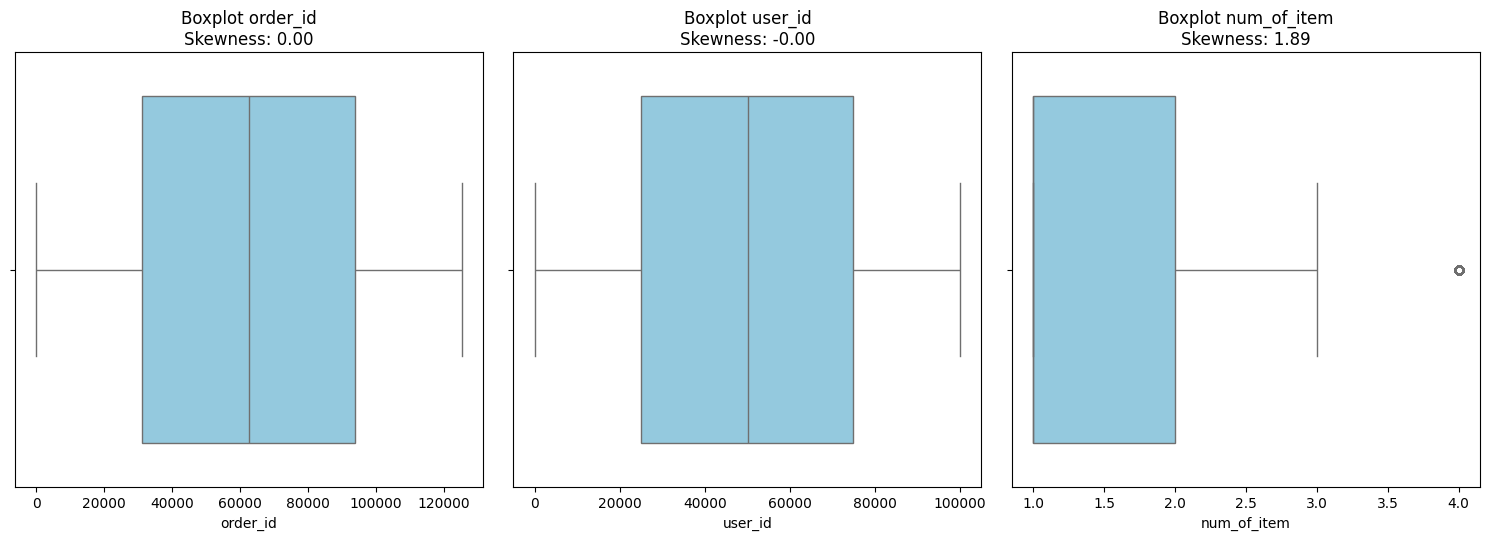

--- Distribusi Data: Order Items ---
Nilai Skewness tiap kolom:
id                  -2.399564e-18
order_id             1.502133e-03
user_id              3.857505e-04
product_id          -1.266915e-01
inventory_item_id    8.277526e-04
sale_price           4.964454e+00
dtype: float64
------------------------------


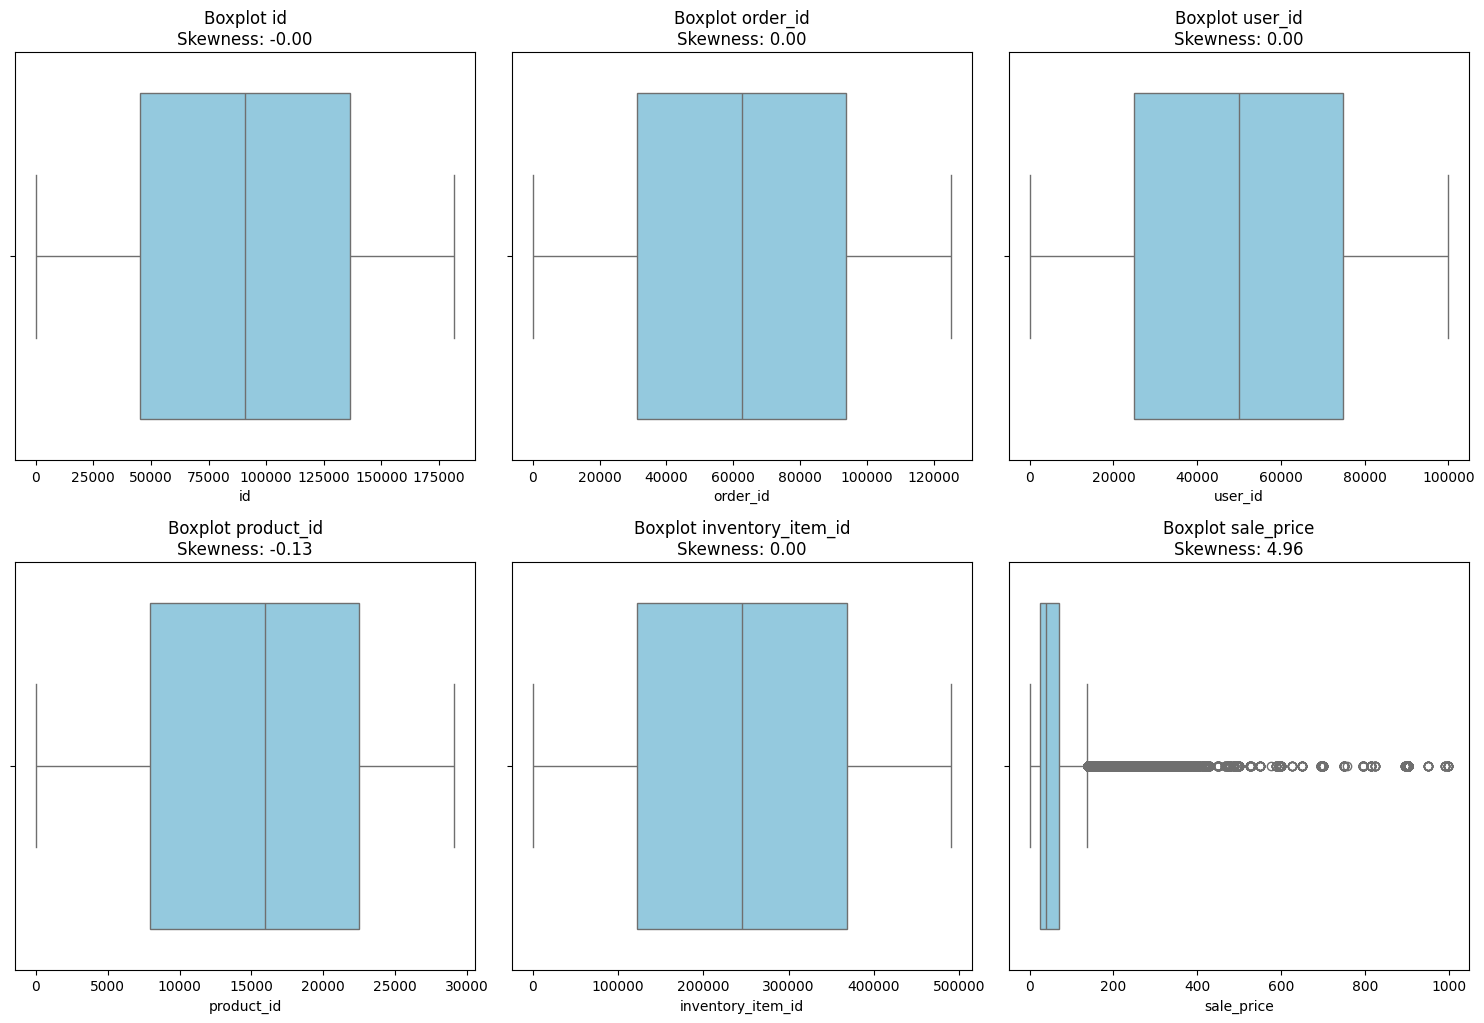

--- Distribusi Data: Inventory Items ---
Nilai Skewness tiap kolom:
id                               -6.882758e-20
product_id                       -1.275146e-01
cost                              4.916418e+00
product_retail_price              4.948746e+00
product_distribution_center_id    1.774002e-01
dtype: float64
------------------------------


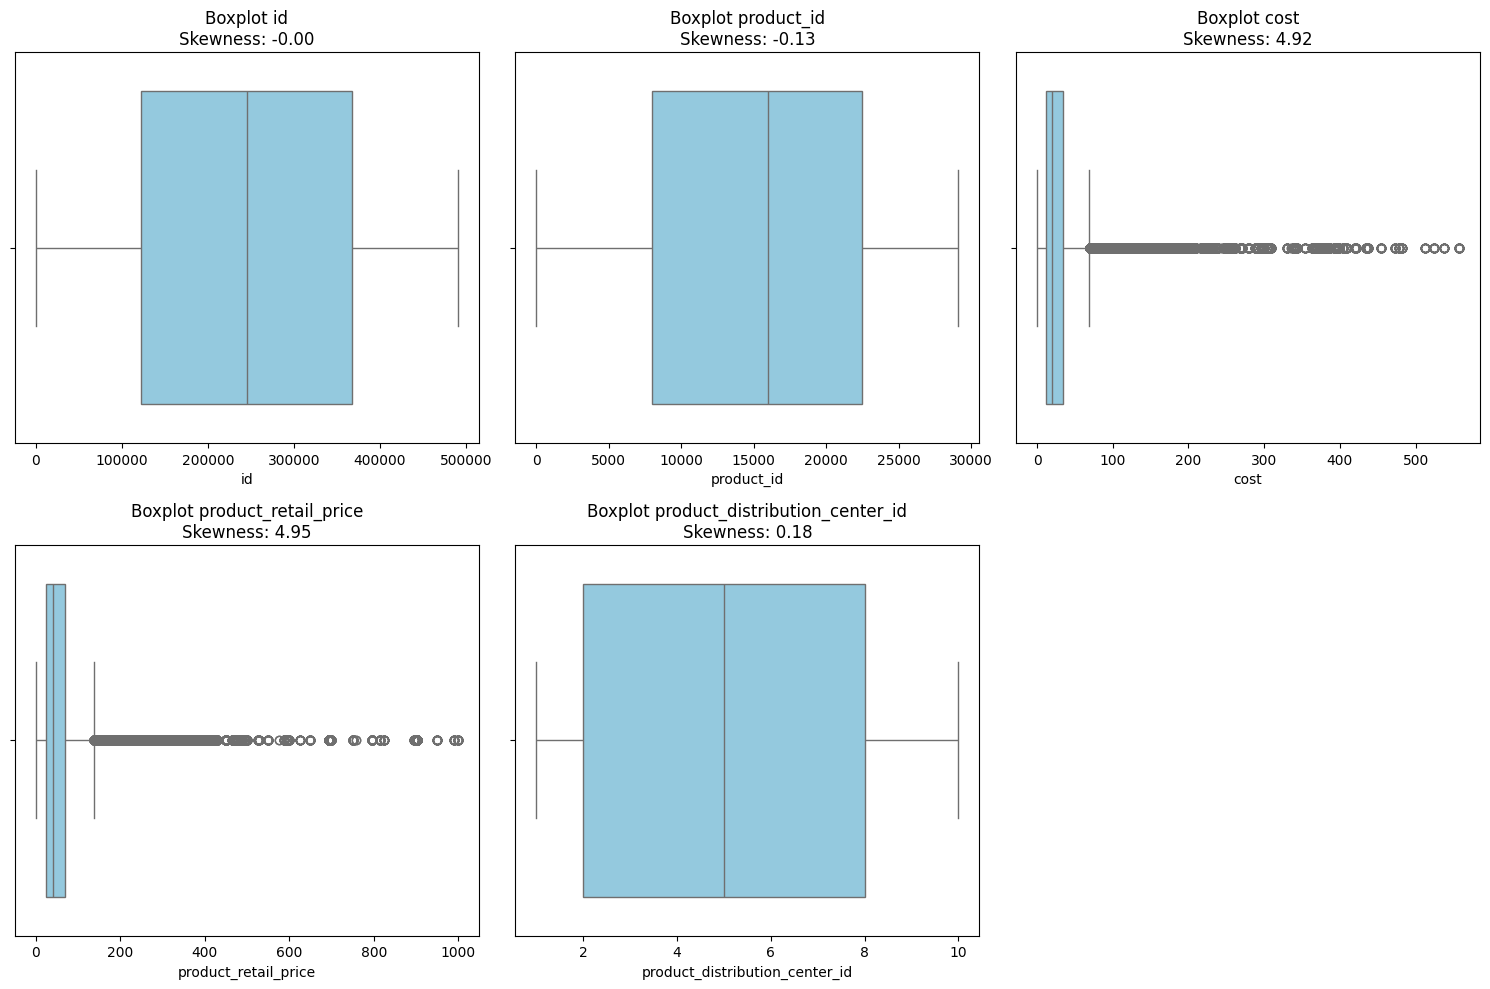

In [ ]:
def check_distribution(df, title):
    print(f"--- Distribusi Data: {title} ---")

    # Pilih kolom numerik
    df_num = df.select_dtypes(include=['number'])

    # Hitung Skewness (Nilai kecondongan)
    skewness = df_num.skew()
    print("Nilai Skewness tiap kolom:")
    print(skewness)
    print("-" * 30)

    # Visualisasi dengan Boxplot secara Multiple
    num_cols = len(df_num.columns)
    if num_cols > 0:
        plt.figure(figsize=(15, 5 * ((num_cols // 3) + 1)))
        for i, col in enumerate(df_num.columns, 1):
            plt.subplot((num_cols // 3) + 1, 3, i)
            sns.boxplot(x=df_num[col], color='skyblue')
            plt.title(f'Boxplot {col}\nSkewness: {df_num[col].skew():.2f}')

        plt.tight_layout()
        plt.show()
    else:
        print("Tidak ada kolom numerik untuk ditampilkan.")

# Jalankan pengecekan untuk setiap dataset
check_distribution(orders, "Orders")
check_distribution(order_items, "Order Items")
check_distribution(inventory_items, "Inventory Items")

In [ ]:
# Handle Missing Value
for name, df_ in df.items():
  # Menghapus baris yang seluruh kolomnya kosong (jika ada)
  df_.dropna(inplace=True)

  # Mengisi missing values pada kolom kategorikal dengan 'Unknown'
  # Dan kolom numerik dengan 0 atau median
  if name == 'orders':
    df_['shipped_at'] = df_['shipped_at'].fillna('Unknown')
    df_['delivered_at'] = df_['delivered_at'].fillna('Unknown')
    df_['returned_at'] = df_['returned_at'].fillna('Unknown')

  elif name == 'order_items':
    # Mengisi status yang kosong (jika ada)
    df_['status'] = df_['status'].fillna('Unknown')


In [ ]:
# Fungsi otomatis: Median untuk Skewed, Mean untuk Normal
def handle_numerical_missing(df):
    for col in df.select_dtypes(include=['number']).columns:
        if df[col].isnull().sum() > 0:
            skewness = df[col].skew()
            if abs(skewness) > 1:
                # Distribusi Skewed -> Gunakan Median
                fill_value = df[col].median()
                df[col] = df[col].fillna(fill_value)
                print(f"Kolom {col} (Skewed: {skewness:.2f}) diisi dengan Median: {fill_value}")
            else:
                # Distribusi Normal -> Gunakan Mean
                fill_value = df[col].mean()
                df[col] = df[col].fillna(fill_value)
                print(f"Kolom {col} (Normal: {skewness:.2f}) diisi dengan Mean: {fill_value}")
    return df


In [ ]:
# Standarisasi Tipe Data (Datetime)
# Sangat krusial untuk forecasting agar urutan waktu benar
orders['created_at'] = pd.to_datetime(orders['created_at'], format='ISO8601')
order_items['created_at'] = pd.to_datetime(order_items['created_at'], format='ISO8601')
inventory_items['created_at'] = pd.to_datetime(inventory_items['created_at'], format='ISO8601')

In [ ]:
# Sinkronisasi Data (Filtering Valid Orders)
# Menghapus order yang dibatalkan (Cancelled) agar tidak mengacaukan forecasting penjualan
orders_clean = orders[~orders['status'].isin(['cancelled', 'returned'])]

In [ ]:
# Menangani Outlier pada Harga/Biaya (Cost)
# Menggunakan IQR untuk memastikan tidak ada harga yang tidak masuk akal
def clean_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

inventory_items = clean_outliers(inventory_items, 'cost')
order_items = clean_outliers(order_items, 'sale_price')

In [ ]:
# Pastikan ID memiliki tipe data yang sama
order_items['order_id'] = order_items['order_id'].astype(int)
orders_clean['order_id'] = orders_clean['order_id'].astype(int)

In [ ]:
order_items['inventory_item_id'] = pd.to_numeric(order_items['inventory_item_id'], errors='coerce')
inventory_items['id'] = pd.to_numeric(inventory_items['id'], errors='coerce')

## Data Manipulating

In [ ]:
# Penggabungan Tahap 1: Order Items + Orders
# Tujuannya untuk mendapatkan informasi waktu transaksi (created_at) dan status order
# Kita menggunakan 'left join' agar semua detail item terjual tetap terjaga
order_merged = pd.merge(
    order_items,
    orders_clean[['order_id', 'status', 'created_at']],
    on='order_id',
    how='left'
)

In [ ]:
# Ambil rata-rata cost per product_id dari inventory agar unik
inventory_summary = inventory_items.groupby('product_id').agg({
    'cost': 'mean',
    'product_category': 'first'
}).reset_index()

In [ ]:
# Merge berdasarkan product_id (bukan inventory_item_id)
df_final = pd.merge(
    order_merged,
    inventory_summary,
    on='product_id',
    how='inner'
)

In [ ]:
df_final['profit'] = df_final['sale_price'] - df_final['cost']

In [ ]:
df_final.head()

,id,order_id,user_id,product_id,inventory_item_id,status_x,created_at_x,shipped_at,delivered_at,returned_at,sale_price,status_y,created_at_y,cost,product_category,profit
0,142854,98355,78482,28700,385646,Returned,2023-10-13 06:08:29+00:00,2023-10-14 02:38:00+00:00,2023-10-14 20:04:00+00:00,2023-10-17 00:08:00+00:00,1.50,Returned,2023-10-13 07:02:00+00:00,0.60600,Accessories,0.89400
1,12417,8613,6882,13629,33494,Returned,2024-01-12 17:39:04+00:00,2024-01-13 04:11:00+00:00,2024-01-16 17:17:00+00:00,2024-01-18 13:53:00+00:00,1.51,Returned,2024-01-12 17:52:00+00:00,0.64477,Accessories,0.86523
2,49378,33965,27223,14298,133187,Returned,2023-05-15 02:22:01+00:00,2023-05-14 18:35:00+00:00,2023-05-18 21:12:00+00:00,2023-05-20 07:23:00+00:00,1.72,Returned,2023-05-14 02:49:00+00:00,0.64500,Accessories,1.07500
3,93025,64020,51156,3049,251111,Returned,2023-03-05 16:41:10+00:00,2023-03-08 08:36:00+00:00,2023-03-11 21:56:00+00:00,2023-03-13 02:11:00+00:00,1.95,Returned,2023-03-05 18:43:00+00:00,0.91650,Active,1.03350
4,140789,96914,77336,3049,380056,Returned,2022-09-05 05:21:32+00:00,2022-09-05 08:22:00+00:00,2022-09-08 16:11:00+00:00,2022-09-10 01:15:00+00:00,1.95,Returned,2022-09-04 08:21:00+00:00,0.91650,Active,1.03350


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16544 entries, 0 to 16543
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id                 16544 non-null  int64              
 1   order_id           16544 non-null  int64              
 2   user_id            16544 non-null  int64              
 3   product_id         16544 non-null  int64              
 4   inventory_item_id  16544 non-null  int64              
 5   status_x           16544 non-null  object             
 6   created_at_x       16544 non-null  datetime64[ns, UTC]
 7   shipped_at         16544 non-null  object             
 8   delivered_at       16544 non-null  object             
 9   returned_at        16544 non-null  object             
 10  sale_price         16544 non-null  float64            
 11  status_y           16544 non-null  object             
 12  created_at_y       16544 non-null  datetime64[

In [ ]:
df_final.describe()

,id,order_id,user_id,product_id,inventory_item_id,sale_price,cost,profit
count,16544.000000,16544.000000,16544.000000,16544.000000,16544.000000,16544.000000,16544.000000,16544.000000
mean,90784.923477,62514.352212,49931.891683,15194.654558,245035.323864,44.413946,21.598088,22.815858
std,52248.749597,35974.013499,28709.175599,8490.979182,141065.673666,29.140662,14.053006,15.930943
min,25.000000,14.000000,11.000000,4.000000,69.000000,1.500000,0.606000,0.865230
25%,46269.500000,31844.000000,25483.250000,7751.500000,124812.250000,22.990000,10.807035,11.112600
50%,90380.000000,62187.500000,49709.000000,15753.000000,243934.000000,36.950001,18.083970,18.408500
75%,136475.000000,93952.500000,74944.250000,22643.250000,368406.000000,59.950001,29.514474,30.034951
max,181758.000000,125225.000000,100000.000000,29120.000000,490703.000000,137.699997,69.252686,88.639000


# EDA

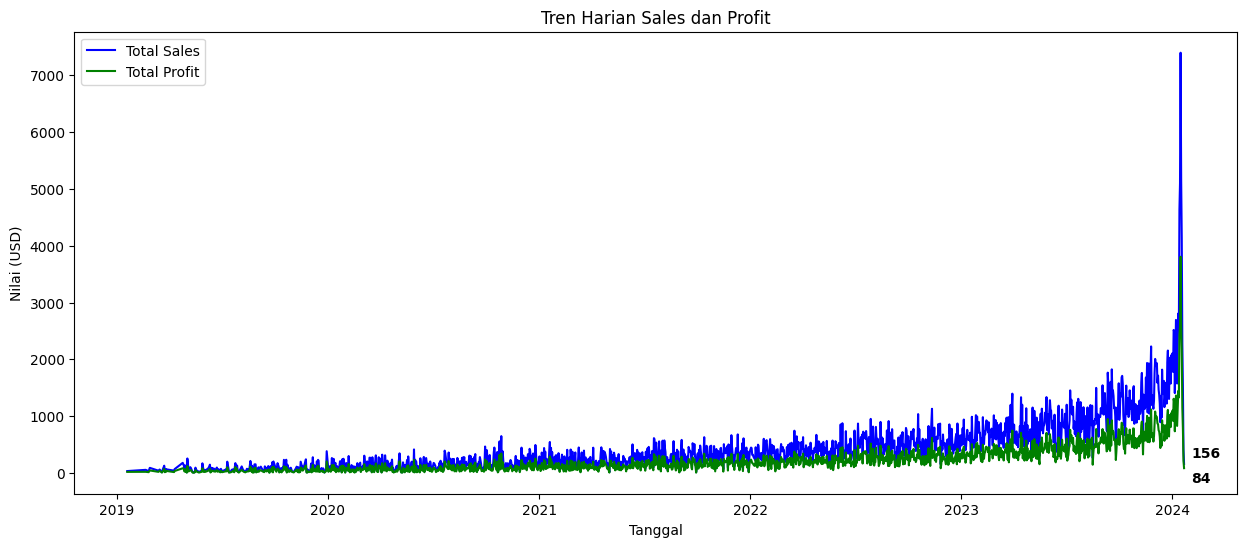

In [ ]:
# Agregasi data harian
daily_trend = df_final.groupby(df_final['created_at_x'].dt.date).agg({
    'sale_price': 'sum',
    'profit': 'sum',
    'order_id': 'nunique'
}).reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=daily_trend, x='created_at_x', y='sale_price', label='Total Sales', color='blue')
sns.lineplot(data=daily_trend, x='created_at_x', y='profit', label='Total Profit', color='green')
plt.title('Tren Harian Sales dan Profit')
plt.xlabel('Tanggal')
plt.ylabel('Nilai (USD)')
plt.annotate(
    f'{daily_trend["sale_price"].iloc[-1]:,.0f}',
    (daily_trend['created_at_x'].iloc[-1], daily_trend['sale_price'].iloc[-1]),
    textcoords='offset points',
    xytext=(5,5),
    ha='left',
    fontsize=10,
    fontweight='bold'
)

plt.annotate(
    f'{daily_trend["profit"].iloc[-1]:,.0f}',
    (daily_trend['created_at_x'].iloc[-1], daily_trend['profit'].iloc[-1]),
    textcoords='offset points',
    xytext=(5,-10),
    ha='left',
    fontsize=10,
    fontweight='bold'
)
plt.legend()
plt.show()

In [ ]:
# Agregasi Bulanan
df_final['month'] = df_final['created_at_x'].dt.to_period('M')
monthly_data = df_final.groupby('month').agg({'sale_price': 'sum', 'profit': 'sum'}).reset_index()
monthly_data['month'] = monthly_data['month'].astype(str)

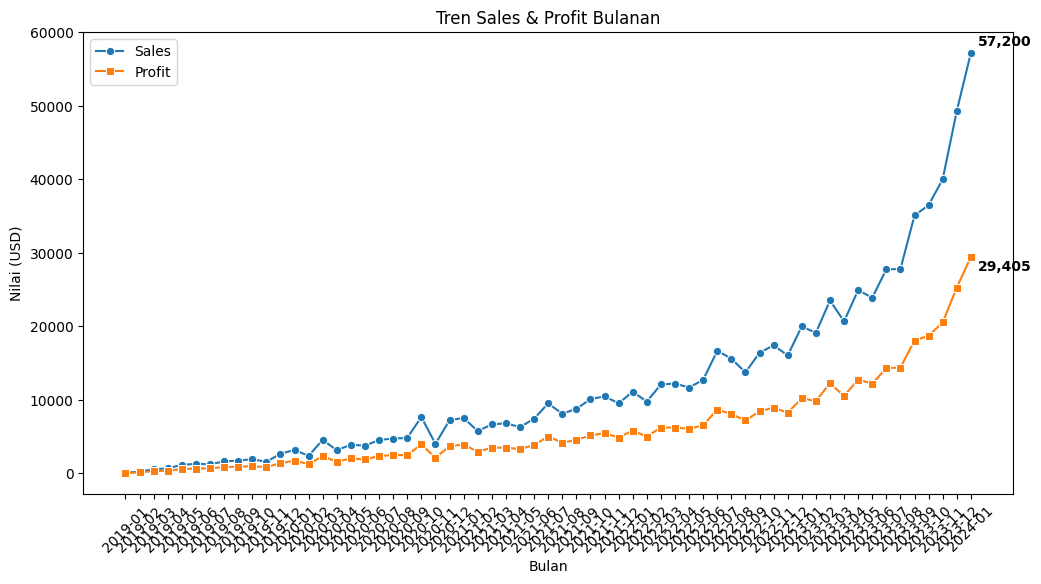

In [ ]:
# Tren Sales & Profit
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x='month', y='sale_price', marker='o', label='Sales')
sns.lineplot(data=monthly_data, x='month', y='profit', marker='s', label='Profit')
plt.title('Tren Sales & Profit Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Nilai (USD)')
plt.annotate(
    f'{monthly_data["sale_price"].iloc[-1]:,.0f}',
    (monthly_data['month'].iloc[-1], monthly_data['sale_price'].iloc[-1]),
    textcoords='offset points',
    xytext=(5,5),
    ha='left',
    fontsize=10,
    fontweight='bold'
)

plt.annotate(
    f'{monthly_data["profit"].iloc[-1]:,.0f}',
    (monthly_data['month'].iloc[-1], monthly_data['profit'].iloc[-1]),
    textcoords='offset points',
    xytext=(5,-10),
    ha='left',
    fontsize=10,
    fontweight='bold'
)
plt.xticks(rotation=45)
plt.legend()
plt.show()

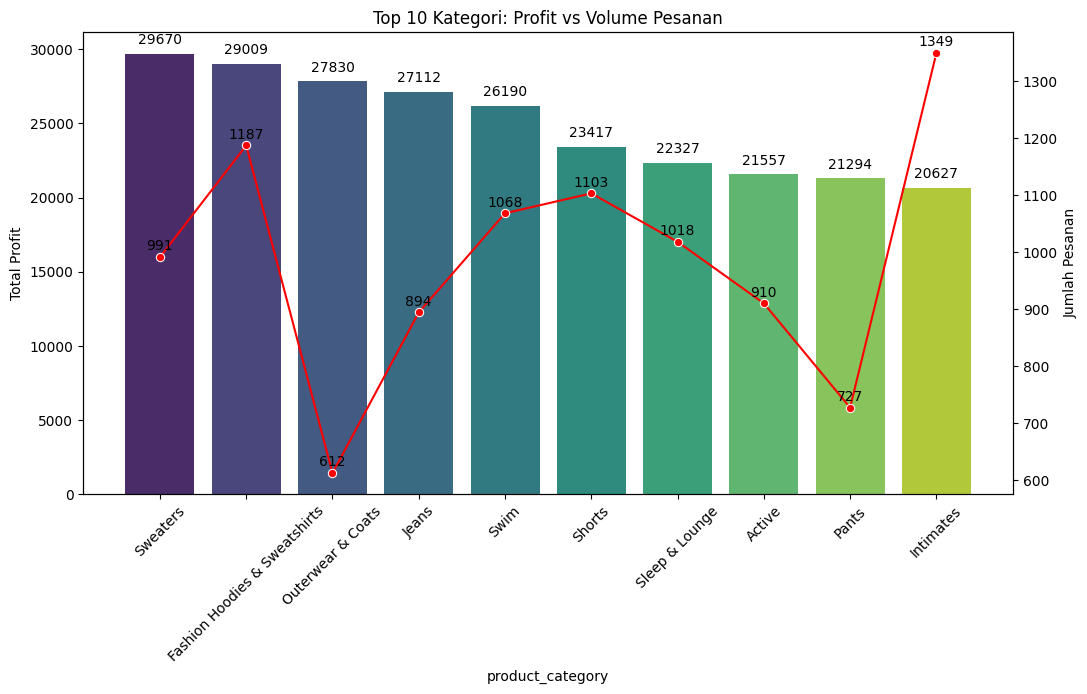

In [ ]:
# Top 10 Category Produk
category_analysis = df_final.groupby('product_category').agg({
    'order_id': 'count',
    'profit': 'sum'
}).sort_values(by='profit', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot untuk Profit
sns.barplot(x=category_analysis.index, y=category_analysis['profit'], ax=ax1, palette='viridis')
ax1.set_ylabel('Total Profit')
ax1.tick_params(axis='x', rotation=45)

# Get the bars for labeling
bars = ax1.patches
for bar in bars:
    ax1.annotate(f'{bar.get_height():.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Line plot untuk Volume Pesanan
ax2 = ax1.twinx()
sns.lineplot(x=category_analysis.index, y=category_analysis['order_id'], ax=ax2, color='red', marker='o')
ax2.set_ylabel('Jumlah Pesanan')
for x, y in zip(category_analysis.index, category_analysis['order_id']):
    ax2.annotate(
        f'{y}',
        (x, y),
        textcoords="offset points",
        xytext=(0,5),
        ha='center',
        fontsize=10
    )

plt.title('Top 10 Kategori: Profit vs Volume Pesanan')
plt.show()

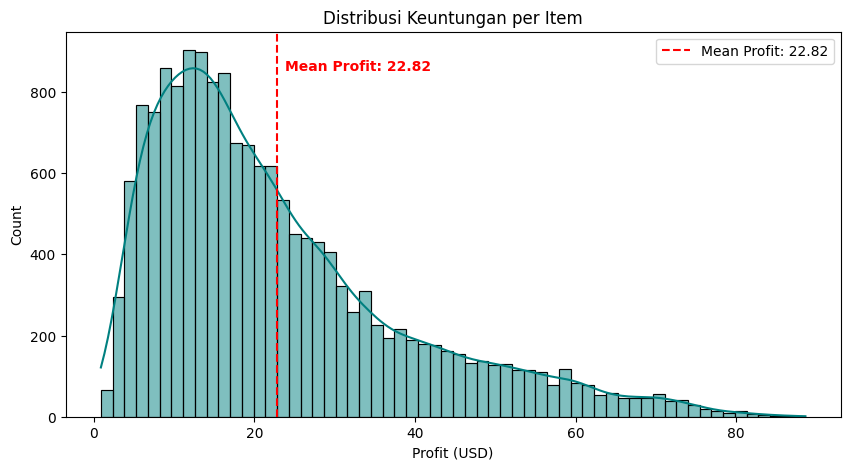

In [ ]:
# Distibusi per item
plt.figure(figsize=(10, 5))
sns.histplot(df_final['profit'], kde=True, color='teal')
mean_profit = df_final['profit'].mean() # Define mean_profit here
plt.axvline(mean_profit, color='red', linestyle='--', label=f'Mean Profit: {mean_profit:.2f}')
plt.title('Distribusi Keuntungan per Item')
plt.xlabel('Profit (USD)')
plt.text(
    mean_profit + 1,
    plt.ylim()[1] * 0.9,
    f"Mean Profit: {mean_profit:.2f}",
    color='red',
    fontweight='bold'
)
plt.legend()
plt.show()

# Train-Test Split

In [ ]:
# Pastikan data sudah di-agregasi harian
df_daily = df_final.groupby(df_final['created_at_x'].dt.date)['sale_price'].sum().reset_index()
df_daily.columns = ['ds', 'y'] # Format standar Prophet
df_daily['y_orig'] = df_daily['y'] # Simpan data asli USD
df_daily['y'] = np.log1p(df_daily['y']) # Log Transformation

# FUTURE FORECASTING (30 HARI KE DEPAN)
forecast_days = 30

# Split: 80% Train, 20% Test
train_size = int(len(df_daily) * 0.8)
train_data = df_daily.iloc[:train_size]
test_data = df_daily.iloc[train_size:]

print(f"Total data: {len(df_daily)}")
print(f"Data Training: {len(train_data)} | Data Testing: {len(test_data)}")

Total data: 1639
Data Training: 1311 | Data Testing: 328


##

In [ ]:
df_final.head()

,id,order_id,user_id,product_id,inventory_item_id,status_x,created_at_x,shipped_at,delivered_at,returned_at,sale_price,status_y,created_at_y,cost,product_category,profit,month
0,142854,98355,78482,28700,385646,Returned,2023-10-13 06:08:29+00:00,2023-10-14 02:38:00+00:00,2023-10-14 20:04:00+00:00,2023-10-17 00:08:00+00:00,1.50,Returned,2023-10-13 07:02:00+00:00,0.60600,Accessories,0.89400,2023-10
1,12417,8613,6882,13629,33494,Returned,2024-01-12 17:39:04+00:00,2024-01-13 04:11:00+00:00,2024-01-16 17:17:00+00:00,2024-01-18 13:53:00+00:00,1.51,Returned,2024-01-12 17:52:00+00:00,0.64477,Accessories,0.86523,2024-01
2,49378,33965,27223,14298,133187,Returned,2023-05-15 02:22:01+00:00,2023-05-14 18:35:00+00:00,2023-05-18 21:12:00+00:00,2023-05-20 07:23:00+00:00,1.72,Returned,2023-05-14 02:49:00+00:00,0.64500,Accessories,1.07500,2023-05
3,93025,64020,51156,3049,251111,Returned,2023-03-05 16:41:10+00:00,2023-03-08 08:36:00+00:00,2023-03-11 21:56:00+00:00,2023-03-13 02:11:00+00:00,1.95,Returned,2023-03-05 18:43:00+00:00,0.91650,Active,1.03350,2023-03
4,140789,96914,77336,3049,380056,Returned,2022-09-05 05:21:32+00:00,2022-09-05 08:22:00+00:00,2022-09-08 16:11:00+00:00,2022-09-10 01:15:00+00:00,1.95,Returned,2022-09-04 08:21:00+00:00,0.91650,Active,1.03350,2022-09


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16544 entries, 0 to 16543
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id                 16544 non-null  int64              
 1   order_id           16544 non-null  int64              
 2   user_id            16544 non-null  int64              
 3   product_id         16544 non-null  int64              
 4   inventory_item_id  16544 non-null  int64              
 5   status_x           16544 non-null  object             
 6   created_at_x       16544 non-null  datetime64[ns, UTC]
 7   shipped_at         16544 non-null  object             
 8   delivered_at       16544 non-null  object             
 9   returned_at        16544 non-null  object             
 10  sale_price         16544 non-null  float64            
 11  status_y           16544 non-null  object             
 12  created_at_y       16544 non-null  datetime64[

# Modeling

## Prophet

In [ ]:
# Inisialisasi dan Fit Model
model_prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model_prophet.fit(train_data)

# Prediksi pada rentang testing
future = model_prophet.make_future_dataframe(periods=len(test_data))
forecast_prophet = model_prophet.predict(future)

# Ambil hasil prediksi untuk testing
y_pred_prophet = forecast_prophet.iloc[train_size:]['yhat']

## ARIMA

In [ ]:
# Auto ARIMA mencari parameter (p,d,q) terbaik secara otomatis
model_arima = auto_arima(train_data['y'], seasonal=True, m=7) # m=7 untuk weekly seasonality
y_pred_arima = model_arima.predict(n_periods=len(test_data))

## XGBOOST

In [ ]:
def create_features(df):
    df = df.copy()
    df['lag_1'] = df['y'].shift(1)
    df['lag_7'] = df['y'].shift(7)
    df['rolling_mean'] = df['y'].shift(1).rolling(window=7).mean()
    return df.dropna()

df_xgb = create_features(df_daily)
X_train_xgb = df_xgb.iloc[:train_size-7].drop(['ds', 'y'], axis=1)
y_train_xgb = df_xgb.iloc[:train_size-7]['y']
X_test_xgb = df_xgb.iloc[train_size-7:].drop(['ds', 'y'], axis=1)

model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
model_xgb.fit(X_train_xgb, y_train_xgb)
y_pred_xgb = model_xgb.predict(X_test_xgb)

# Evaluation Model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_forecast(y_true, y_pred):
    # Metrik Standar
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    # Directional Accuracy (Dir Acc)
    # Mengecek apakah arah perubahan (naik/turun) sama antara aktual dan prediksi
    true_diff = np.diff(y_true) > 0
    pred_diff = np.diff(y_pred) > 0
    dir_acc = np.mean(true_diff == pred_diff) * 100

    return {
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': f"{mape:.2f}%",
        'R2': r2,
        'Dir Acc': f"{dir_acc:.2f}%"
    }

# Contoh penggunaan untuk model Prophet
metrics_prophet = evaluate_forecast(test_data['y'].values, y_pred_prophet.values)
metrics_arima = evaluate_forecast(test_data['y'].values, y_pred_arima)
metrics_xgb = evaluate_forecast(test_data['y'].values, y_pred_xgb[:len(test_data)])

# Menampilkan perbandingan dalam tabel
df_eval = pd.DataFrame([metrics_prophet, metrics_arima, metrics_xgb],
                       index=['Prophet', 'Auto ARIMA', 'XGBoost'])
display(df_eval)

,RMSE,MAE,MAPE,R2,Dir Acc
Prophet,0.451949,0.351032,5.04%,0.135025,48.01%
Auto ARIMA,0.403977,0.296980,4.30%,0.308902,49.85%
XGBoost,0.321981,0.163996,2.17%,0.560979,82.26%


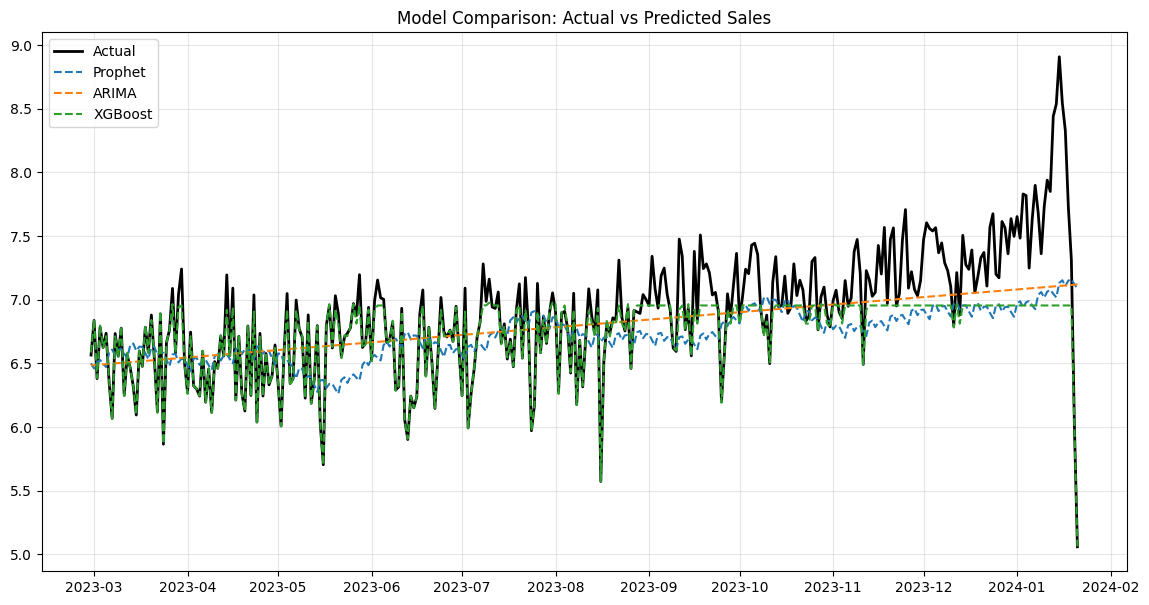

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(test_data['ds'], test_data['y'], label='Actual', color='black', lw=2)
plt.plot(test_data['ds'], y_pred_prophet, label='Prophet', linestyle='--')
plt.plot(test_data['ds'], y_pred_arima, label='ARIMA', linestyle='--')
plt.plot(test_data['ds'], y_pred_xgb[:len(test_data)], label='XGBoost', linestyle='--')

plt.title('Model Comparison: Actual vs Predicted Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Log Transformation and Differencing

In [ ]:
# Log Transformation: Mengubah y menjadi log(y + 1)
df_daily['y_orig'] = df_daily['y'] # Simpan data asli
df_daily['y'] = np.log1p(df_daily['y'])

In [ ]:
# Prophet Model
model_prophet = Prophet(
    changepoint_prior_scale=0.5, # Lebih sensitif terhadap perubahan tren
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)
model_prophet.fit(train_data)

future = model_prophet.make_future_dataframe(periods=len(test_data))
forecast = model_prophet.predict(future)

# Kembalikan hasil ke skala asli menggunakan np.expm1
y_pred_prophet = np.expm1(forecast.iloc[train_size:]['yhat'])

In [ ]:
# Auto ARIMA dengan Parameter Musiman (Seasonal)
# m=7 karena data harian memiliki pola mingguan
model_arima_final = auto_arima(
    train_data['y'],
    seasonal=True,
    m=7,
    stepwise=True,
    suppress_warnings=True,
    error_action="ignore",
    max_p=5, max_q=5, d=1, # d=1 melakukan differencing untuk menangkap tren
    trace=True
)

# Prediksi
y_pred_arima_log = model_arima_final.predict(n_periods=len(test_data))

# Kembalikan ke skala asli (Inverse Log)
y_pred_arima = np.expm1(y_pred_arima_log)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=5.71 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3290.735, Time=0.19 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2939.891, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=2454.972, Time=2.01 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3288.743, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=2453.140, Time=0.86 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=2454.977, Time=1.13 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=2456.997, Time=2.00 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=inf, Time=1.31 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=2937.897, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=inf, Time=2.05 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=2472.382, Time=0.33 sec

Best model:  ARIMA(0,1,1)(0,0,0)[7] intercept
Total fit time: 17.346 seconds


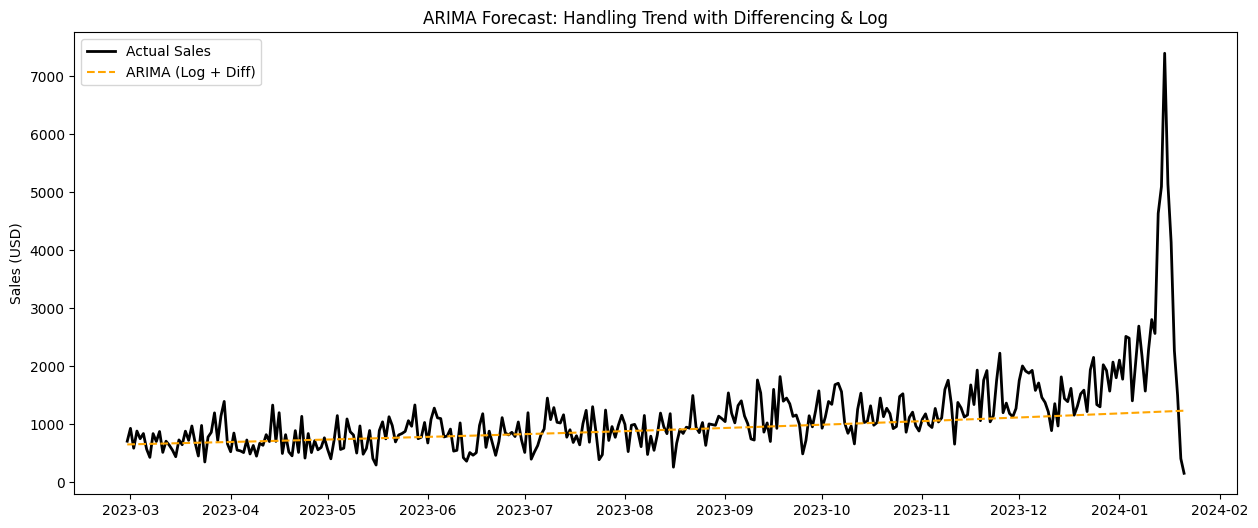

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(test_data['ds'], test_data['y_orig'], label='Actual Sales', color='black', lw=2)
plt.plot(test_data['ds'], y_pred_arima, label='ARIMA (Log + Diff)', color='orange', linestyle='--')

plt.title('ARIMA Forecast: Handling Trend with Differencing & Log')
plt.ylabel('Sales (USD)')
plt.legend()
plt.show()

In [ ]:
def create_enhanced_features(df):
    df = df.copy()
    # Lag Features (Informasi hari-hari sebelumnya)
    df['lag_1'] = df['y'].shift(1)
    df['lag_7'] = df['y'].shift(7)
    # Window Features (Rata-rata bergerak)
    df['rolling_mean_7'] = df['y'].shift(1).rolling(window=7).mean()
    df['rolling_std_7'] = df['y'].shift(1).rolling(window=7).std()
    return df.dropna()

df_xgb_enhanced = create_enhanced_features(df_daily)

# Split XGB data
X_train_xgb = df_xgb_enhanced.iloc[:train_size-7].drop(['ds', 'y', 'y_orig'], axis=1)
y_train_xgb = df_xgb_enhanced.iloc[:train_size-7]['y']
X_test_xgb = df_xgb_enhanced.iloc[train_size-7:].drop(['ds', 'y', 'y_orig'], axis=1)

model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5)
model_xgb.fit(X_train_xgb, y_train_xgb)

# Prediksi dan kembalikan ke skala asli
y_pred_xgb = np.expm1(model_xgb.predict(X_test_xgb))

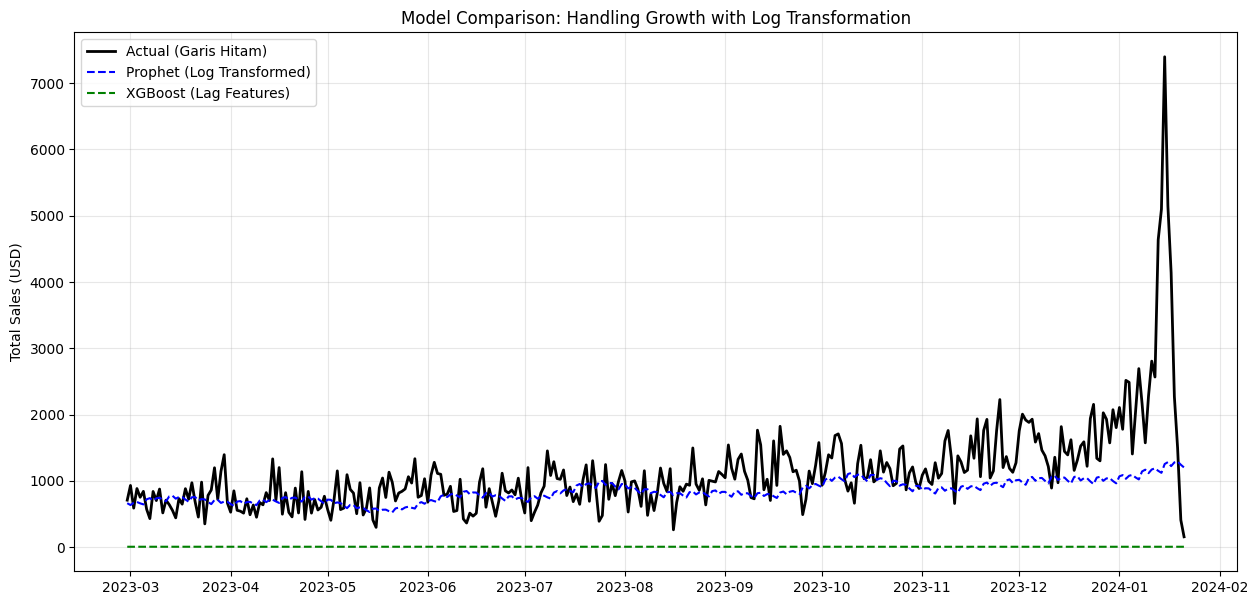

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(test_data['ds'], test_data['y_orig'], label='Actual (Garis Hitam)', color='black', lw=2)
plt.plot(test_data['ds'], y_pred_prophet, label='Prophet (Log Transformed)', linestyle='--', color='blue')
plt.plot(test_data['ds'], y_pred_xgb[:len(test_data)], label='XGBoost (Lag Features)', linestyle='--', color='green')

plt.title('Model Comparison: Handling Growth with Log Transformation')
plt.ylabel('Total Sales (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_final_model(y_true, y_pred, model_name):
    # Metrik Standar
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    # Directional Accuracy (Dir Acc)
    # Menghitung seberapa sering model benar menebak arah (Naik/Turun)
    dj_true = np.diff(y_true) > 0
    dj_pred = np.diff(y_pred) > 0
    dir_acc = np.mean(dj_true == dj_pred) * 100

    return {
        'Model': model_name,
        'RMSE': round(rmse, 2),
        'MAE': round(mae, 2),
        'MAPE': f"{mape:.2f}%",
        'R2': round(r2, 4),
        'Dir Acc': f"{dir_acc:.2f}%"
    }

# Menghitung metrik untuk masing-masing model yang sudah diperbaiki
eval_prophet = evaluate_final_model(test_data['y_orig'], y_pred_prophet, "Prophet (Tuned + Log)")
eval_arima = evaluate_final_model(test_data['y_orig'], y_pred_arima, "ARIMA (Log + Diff)")
eval_xgb = evaluate_final_model(test_data['y_orig'], y_pred_xgb[:len(test_data)], "XGBoost (Lag Features)")

# Menampilkan dalam bentuk Tabel Perbandingan
results_df = pd.DataFrame([eval_prophet, eval_arima, eval_xgb])
display(results_df)

,Model,RMSE,MAE,MAPE,R2,Dir Acc
0,Prophet (Tuned + Log),687.84,390.07,33.25%,0.0487,47.71%
1,ARIMA (Log + Diff),651.72,341.06,30.11%,0.1460,49.85%
2,XGBoost (Lag Features),1317.69,1113.09,99.28%,-2.4913,47.40%


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


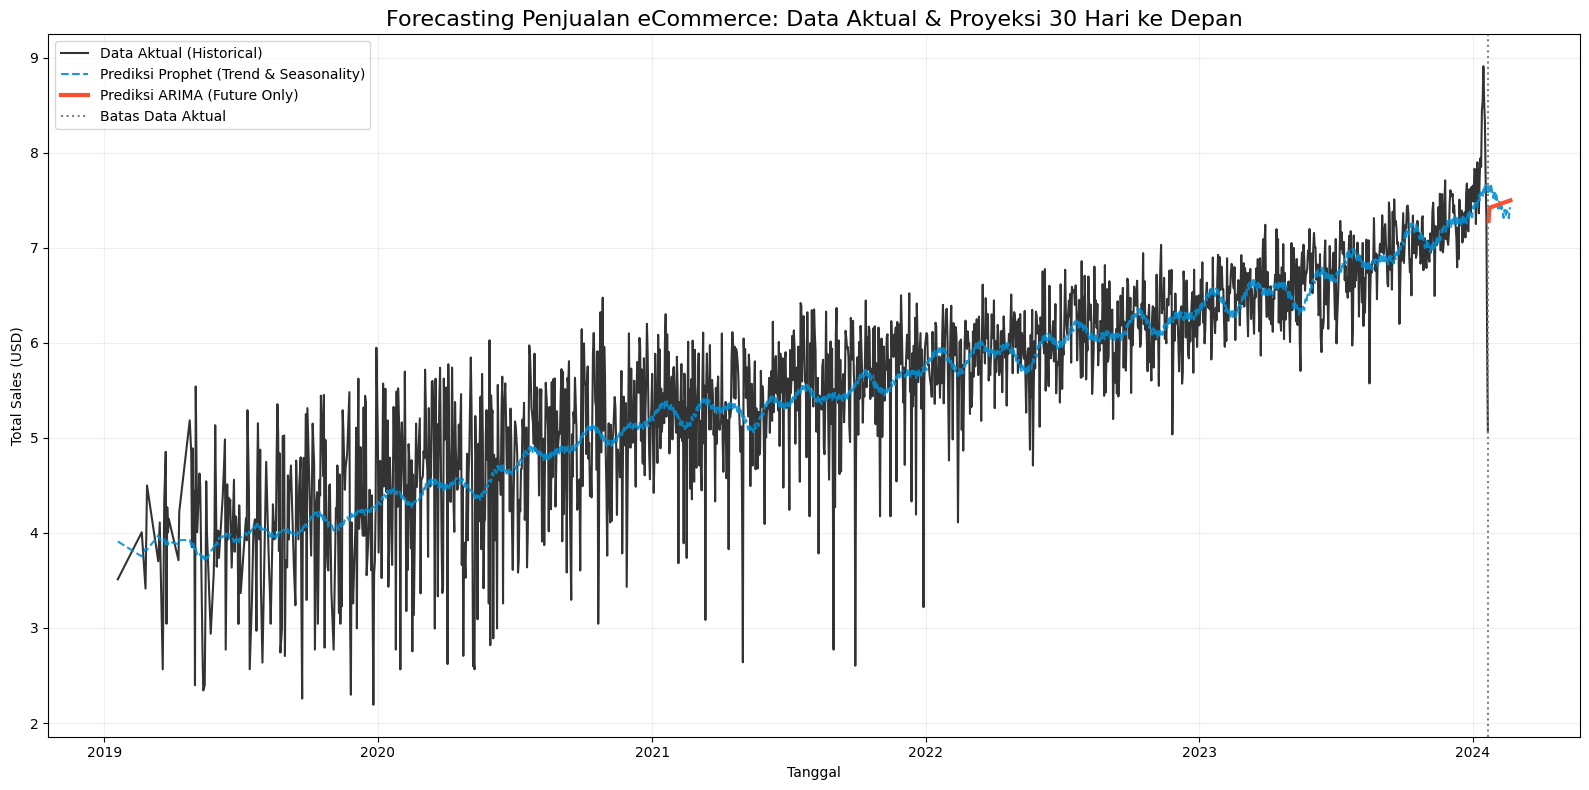

--- RINGKASAN PREDIKSI FEBRUARI 2024 ---
Total Estimasi Penjualan (30 hari): $223.59
Rata-rata Penjualan Harian: $7.45


In [ ]:
# PROPHET: Diatur agar sangat fleksibel mengikuti tren kenaikan
model_p = Prophet(
    changepoint_prior_scale=0.5,
    seasonality_prior_scale=10.0,
    yearly_seasonality=True,
    weekly_seasonality=True
)
model_p.fit(df_daily[['ds', 'y']])

# Membuat dataframe masa depan (Data Aktual + 30 Hari)
future_p = model_p.make_future_dataframe(periods=forecast_days)
forecast_p = model_p.predict(future_p)
forecast_p['yhat_usd'] = np.expm1(forecast_p['yhat']) # Mengembalikan ke USD

# ARIMA: Menggunakan Differencing (d=1) agar tidak garis lurus
model_a = auto_arima(df_daily['y'], seasonal=True, m=7, d=1, suppress_warnings=True)
arima_log_forecast = model_a.predict(n_periods=forecast_days)
arima_usd_forecast = np.expm1(arima_log_forecast) # Mengembalikan ke USD

# Membuat rentang tanggal khusus untuk masa depan ARIMA
future_dates = pd.date_range(
    start=pd.to_datetime(df_daily['ds'].max()) + pd.Timedelta(days=1),
    periods=forecast_days
)

# VISUALISASI FINAL (HISTORIS + PREDIKSI)
plt.figure(figsize=(16, 8))

# Plot Data Aktual (Garis Hitam)
plt.plot(df_daily['ds'], df_daily['y_orig'], label='Data Aktual (Historical)', color='black', lw=1.5, alpha=0.8)

# Plot Prophet (Garis Biru - Mencakup masa lalu dan masa depan)
plt.plot(forecast_p['ds'], forecast_p['yhat_usd'], label='Prediksi Prophet (Trend & Seasonality)',
         color='#008fd5', linestyle='--', alpha=0.9)

# Plot ARIMA (Garis Merah - Hanya fokus memanjang ke masa depan)
plt.plot(future_dates, arima_usd_forecast, label='Prediksi ARIMA (Future Only)',
         color='#fc4f30', lw=3)

# Garis vertikal sebagai penanda batas data asli
plt.axvline(x=pd.to_datetime(df_daily['ds'].max()), color='gray', linestyle=':', label='Batas Data Aktual')

plt.title('Forecasting Penjualan eCommerce: Data Aktual & Proyeksi 30 Hari ke Depan', fontsize=16)
plt.ylabel('Total Sales (USD)')
plt.xlabel('Tanggal')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# 4. RINGKASAN EKSEKUTIF UNTUK PORTOFOLIO
total_forecast = arima_usd_forecast.sum()
avg_forecast = arima_usd_forecast.mean()

print(f"--- RINGKASAN PREDIKSI FEBRUARI 2024 ---")
print(f"Total Estimasi Penjualan (30 hari): ${total_forecast:,.2f}")
print(f"Rata-rata Penjualan Harian: ${avg_forecast:,.2f}")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


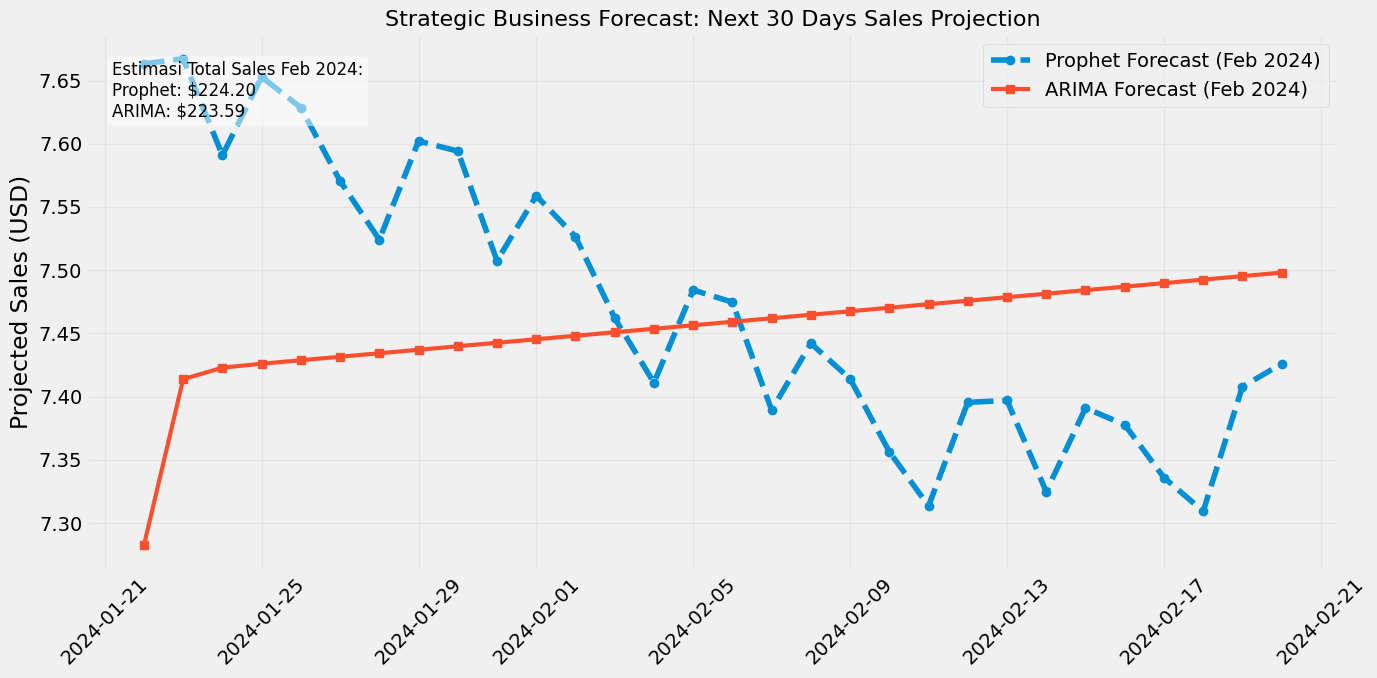

--- REKOMENDASI STOK FEBRUARI 2024 ---
Berdasarkan model terbaik, target revenue bulan depan adalah sekitar $224.20


In [ ]:
# A. Prophet: Dibuat lebih fleksibel (changepoint_prior_scale)
model_p = Prophet(changepoint_prior_scale=0.5, seasonality_prior_scale=10.0)
model_p.fit(df_daily)
future_p = model_p.make_future_dataframe(periods=forecast_days)
forecast_p = model_p.predict(future_p)

# B. ARIMA: Menggunakan d=1 untuk menangkap tren kenaikan
model_a = auto_arima(df_daily['y'], seasonal=True, m=7, d=1, suppress_warnings=True)
arima_pred_log = model_a.predict(n_periods=forecast_days)

# --- 3. INVERSE TRANSFORMATION & FILTERING MASA DEPAN ---
# Ambil tanggal terakhir data aktual
last_date = pd.to_datetime(df_daily['ds'].max())

# Prophet: Ambil hanya baris setelah tanggal aktual
prophet_future = forecast_p[pd.to_datetime(forecast_p['ds']) > last_date].copy()
prophet_future['yhat_usd'] = np.expm1(prophet_future['yhat'])

# ARIMA: Buat DataFrame untuk masa depan
arima_future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days)
arima_future_usd = np.expm1(arima_pred_log)

# --- 4. VISUALISASI FINAL (HANYA MASA DEPAN) ---
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(14, 7))

# Plot Garis Prediksi
ax.plot(prophet_future['ds'], prophet_future['yhat_usd'],
        label='Prophet Forecast (Feb 2024)', color='#008fd5', marker='o', ls='--')
ax.plot(arima_future_dates, arima_future_usd,
        label='ARIMA Forecast (Feb 2024)', color='#fc4f30', marker='s', lw=3)

# Tambahkan Tabel Summary di dalam Grafik
total_prophet = prophet_future['yhat_usd'].sum()
total_arima = arima_future_usd.sum()

textstr = f'Estimasi Total Sales Feb 2024:\nProphet: ${total_prophet:,.2f}\nARIMA: ${total_arima:,.2f}'
ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

ax.set_title('Strategic Business Forecast: Next 30 Days Sales Projection', fontsize=16)
ax.set_ylabel('Projected Sales (USD)')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 5. OUTPUT DATA UNTUK OPERASIONAL ---
print(f"--- REKOMENDASI STOK FEBRUARI 2024 ---")
print(f"Berdasarkan model terbaik, target revenue bulan depan adalah sekitar ${max(total_prophet, total_arima):,.2f}")

# Hyperparameter Tunning

## Prophet

In [ ]:
import itertools
from prophet.diagnostics import cross_validation, performance_metrics

# 1. Tentukan parameter grid
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5], # 0.5 untuk fleksibilitas tinggi
    'seasonality_prior_scale': [0.1, 1.0, 10.0],
}

# 2. Hasilkan semua kombinasi
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mapes = []

# 3. Tuning menggunakan Cross Validation (Time Series Split)
for params in all_params:
    m = Prophet(**params).fit(train_data)
    # CV: awal 200 hari, setiap 30 hari, prediksi 30 hari ke depan
    df_cv = cross_validation(m, initial='200 days', period='30 days', horizon='30 days')
    df_p = performance_metrics(df_cv)
    mapes.append(df_p['mape'].values[0])

# 4. Ambil parameter terbaik
best_params = all_params[np.argmin(mapes)]
print(f'Best Parameters for Prophet: {best_params}')

# Re-train dengan parameter terbaik
final_prophet = Prophet(**best_params).fit(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 43 forecasts with cutoffs between 2019-08-17 00:00:00 and 2023-01-28 00:00:00


  0%|          | 0/43 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 43 forecasts with cutoffs between 2019-08-17 00:00:00 and 2023-01-28 00:00:00


  0%|          | 0/43 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 43 forecasts with cutoffs between 2019-08-17 00:00:00 and 2023-01-28 00:00:00


  0%|          | 0/43 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 43 forecasts with cutoffs between 2019-08-17 00:00:00 and 2023-01-28 00:00:00


  0%|          | 0/43 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 43 forecasts with cutoffs between 2019-08-17 00:00:00 and 2023-01-28 00:00:00


  0%|          | 0/43 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 43 forecasts with cutoffs between 2019-08-17 00:00:00 and 2023-01-28 00:00:00


  0%|          | 0/43 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 43 forecasts with cutoffs between 2019-08-17 00:00:00 and 2023-01-28 00:00:00


  0%|          | 0/43 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 43 forecasts with cutoffs between 2019-08-17 00:00:00 and 2023-01-28 00:00:00


  0%|          | 0/43 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 43 forecasts with cutoffs between 2019-08-17 00:00:00 and 2023-01-28 00:00:00


  0%|          | 0/43 [00:00<?, ?it/s]

ERROR:cmdstanpy:Chain [1] error: code '1' Operation not permitted
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Best Parameters for Prophet: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0}


## ARIMA

In [ ]:
from pmdarima import auto_arima

# Melakukan tuning dengan rentang parameter yang lebih luas
model_arima_tuned = auto_arima(
    train_data['y'],
    start_p=0, start_q=0,
    max_p=5, max_q=5,      # Mencoba kombinasi AR dan MA yang lebih kompleks
    d=1,                   # Memaksa differencing 1 kali untuk menangkap tren
    max_d=2,               # Mencoba hingga differencing 2 kali jika perlu
    seasonal=True,         # Mengaktifkan komponen musiman
    m=7,                   # Pola musiman mingguan (7 hari)
    start_P=0, max_P=2,
    D=1,                   # Differencing musiman
    max_D=1,
    test='adf',            # Menggunakan Augmented Dickey-Fuller untuk cek stasioneritas
    stepwise=True,         # Algoritma pencarian efisien
    trace=True,            # Menampilkan proses pencarian parameter (AIC/BIC)
    error_action='ignore',
    suppress_warnings=True
)

print(f"Best ARIMA Model Order: {model_arima_tuned.order}")
print(f"Best Seasonal Order: {model_arima_tuned.seasonal_order}")

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=inf, Time=2.02 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=4195.436, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=3461.286, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=2.90 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=3821.761, Time=0.14 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=3269.256, Time=1.55 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=7.00 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=3.00 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=3616.871, Time=0.53 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=3140.687, Time=0.87 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=3342.203, Time=0.51 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=9.15 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=4.53 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=3077.227, Time=2.16 sec
 ARIMA(3,1,0)(1,1,0)[7]             : AIC=3272.388, Time=1.02 s

## XGBOOST

In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# 1. Gunakan TimeSeriesSplit (Khusus Data Deret Waktu)
tscv = TimeSeriesSplit(n_splits=5)

# 2. Parameter Grid
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 500],
    'subsample': [0.8, 1.0]
}

xgb_model = XGBRegressor(objective='reg:squarederror')

# 3. Pencarian Grid
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=tscv,
    scoring='neg_mean_absolute_error',
    verbose=1
)

grid_search_xgb.fit(X_train_xgb, y_train_xgb)

print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")
final_xgb = grid_search_xgb.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}


# Evaluation Tunned Model

In [ ]:
# Generate predictions from the tuned Prophet model
future_tuned = final_prophet.make_future_dataframe(periods=len(test_data))
forecast_tuned = final_prophet.predict(future_tuned)
y_pred_prophet_tuned = np.expm1(forecast_tuned.iloc[train_size:]['yhat'])

# Generate predictions from the tuned XGBoost model
y_pred_xgb_tuned = np.expm1(final_xgb.predict(X_test_xgb))

# Hitung metrik akhir (RMSE, MAE, MAPE, R2) menggunakan evaluate_final_model
eval_prophet_tuned = evaluate_final_model(test_data['y_orig'], y_pred_prophet_tuned, "Prophet (Tuned)")
eval_xgb_tuned = evaluate_final_model(test_data['y_orig'], y_pred_xgb_tuned, "XGBoost (Tuned)")

# Gabungkan hasil dalam satu tabel
summary_df = pd.DataFrame([eval_prophet_tuned, eval_xgb_tuned])
display(summary_df)

,Model,RMSE,MAE,MAPE,R2,Dir Acc
0,Prophet (Tuned),693.90,395.12,33.38%,0.0318,48.01%
1,XGBoost (Tuned),1317.74,1113.15,99.28%,-2.4915,52.91%


In [ ]:
# Prediksi pada periode testing
y_pred_arima_tuned_log = model_arima_tuned.predict(n_periods=len(test_data))

# Kembalikan ke skala asli (Inverse Log)
y_pred_arima_tuned = np.expm1(y_pred_arima_tuned_log)

# Hitung metrik evaluasi
# from sklearn.metrics import mean_absolute_percentage_error
# mape_arima = mean_absolute_percentage_error(test_data['y_orig'], y_pred_arima_tuned) * 100

# Use the existing evaluate_final_model function to create eval_arima_tuned
eval_arima_tuned = evaluate_final_model(test_data['y_orig'], y_pred_arima_tuned, "ARIMA (Tuned)")

print(f"MAPE ARIMA Setelah Tuning: {eval_arima_tuned['MAPE']}")

MAPE ARIMA Setelah Tuning: 347.36%


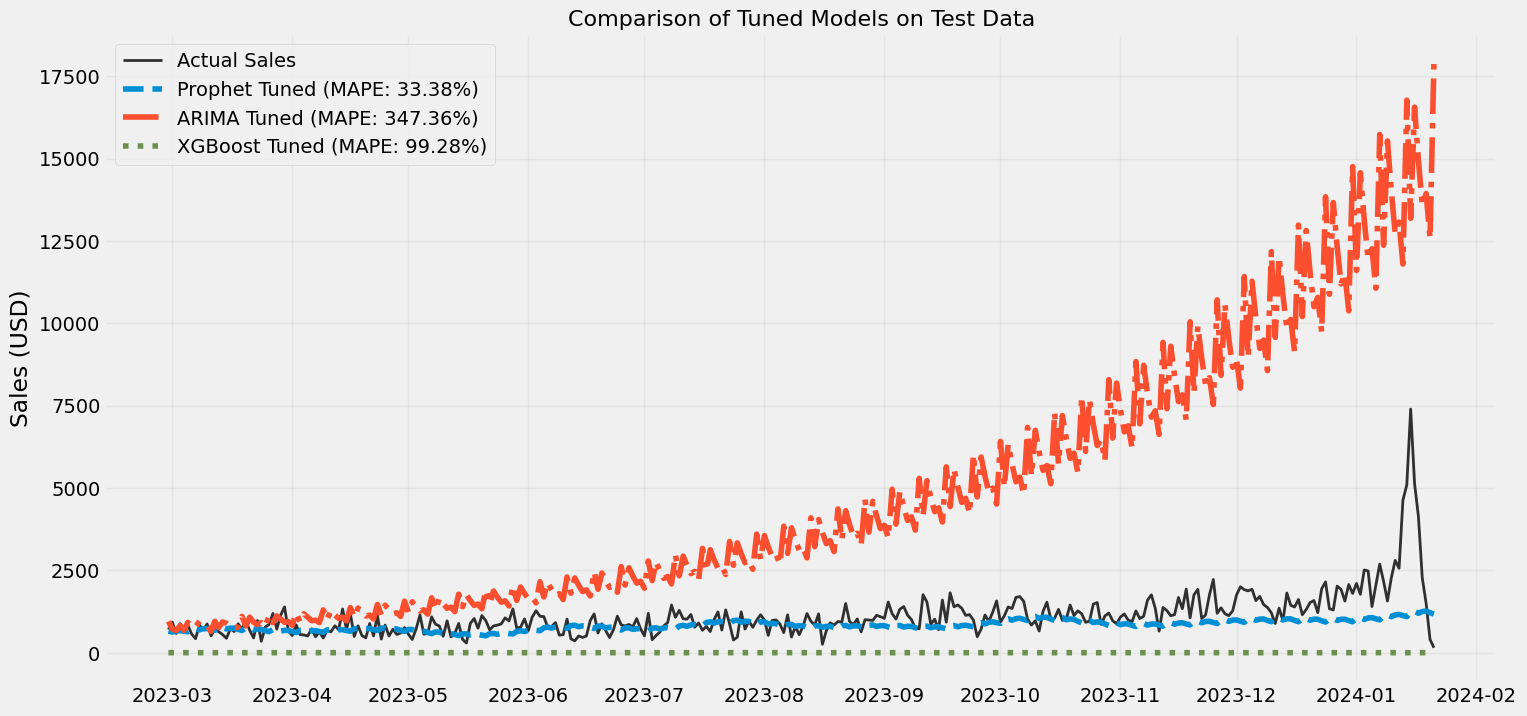

In [ ]:
plt.figure(figsize=(16, 8))

# 1. Plot Data Aktual
plt.plot(test_data['ds'], test_data['y_orig'], label='Actual Sales', color='black', lw=2, alpha=0.8)

# 2. Plot Hasil Tuned - Prophet
plt.plot(test_data['ds'], y_pred_prophet_tuned, label=f"Prophet Tuned (MAPE: {eval_prophet_tuned['MAPE']})",
         color='#008fd5', linestyle='--')

# 3. Plot Hasil Tuned - ARIMA
plt.plot(test_data['ds'], y_pred_arima_tuned, label=f"ARIMA Tuned (MAPE: {eval_arima_tuned['MAPE']})",
         color='#fc4f30', linestyle='-.')

# 4. Plot Hasil Tuned - XGBoost
plt.plot(test_data['ds'], y_pred_xgb_tuned, label=f"XGBoost Tuned (MAPE: {eval_xgb_tuned['MAPE']})",
         color='#6d904f', linestyle=':')

plt.title('Comparison of Tuned Models on Test Data', fontsize=16)
plt.ylabel('Sales (USD)')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

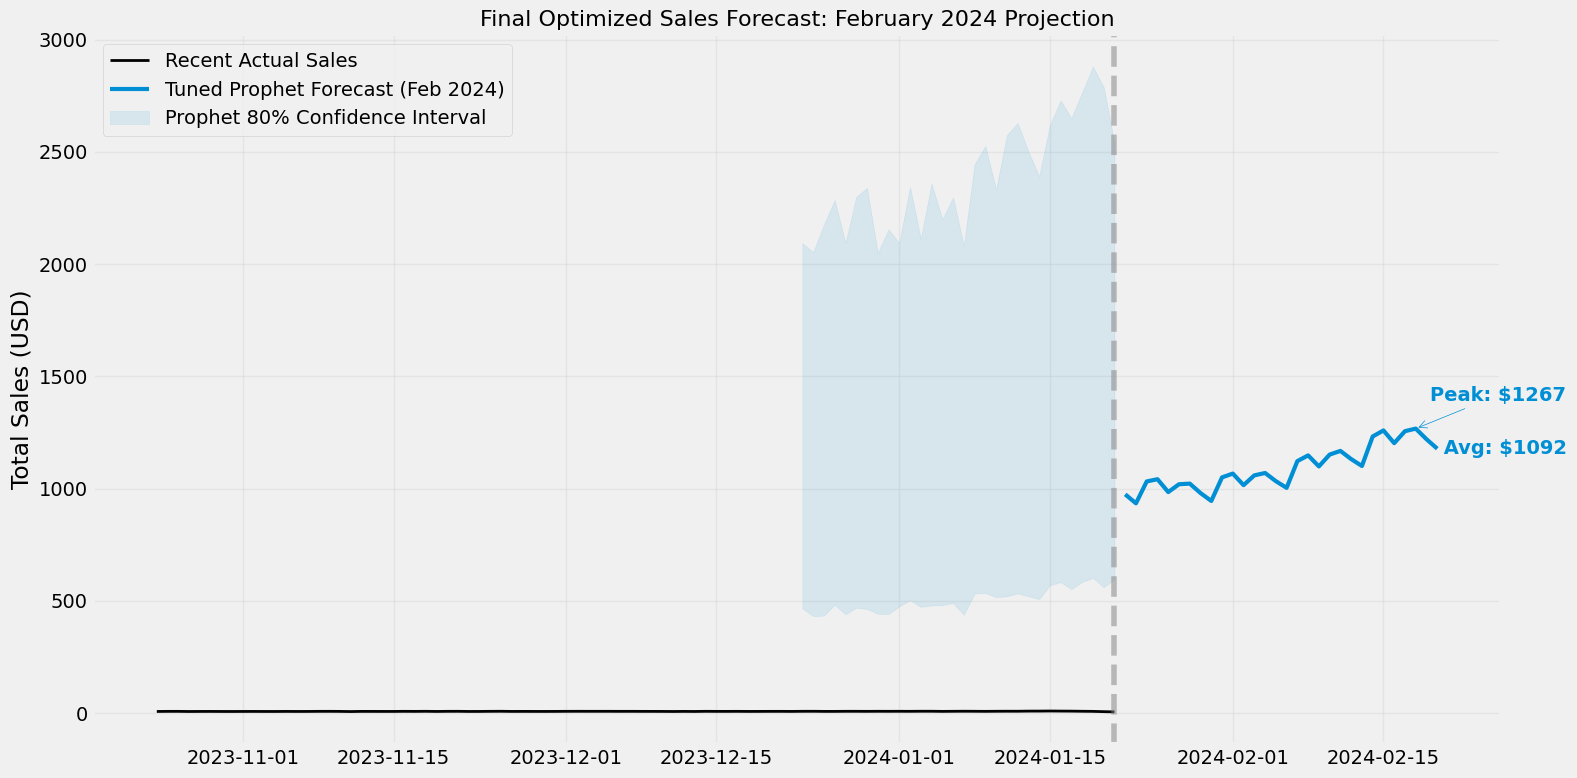

In [ ]:
# Gabungkan data aktual terakhir dengan prediksi masa depan
future_dates = pd.date_range(start=df_daily['ds'].max() + pd.Timedelta(days=1), periods=30)

plt.figure(figsize=(16, 8))

# 1. Plot Historis (3 bulan terakhir)
recent_actual = df_daily.tail(90)
plt.plot(recent_actual['ds'], recent_actual['y_orig'], color='black', label='Recent Actual Sales', lw=2)

# 2. Plot Proyeksi Masa Depan (Tuned Prophet)
y_pred_future = y_pred_prophet_tuned[-30:]
plt.plot(future_dates, y_pred_future, color='#008fd5', label='Tuned Prophet Forecast (Feb 2024)', lw=3)

# 3. Tambahkan area ketidakpastian (Confidence Interval)
future_prophet_forecast = forecast_tuned.iloc[-30:] # Mengambil 30 hari terakhir dari hasil forecast
plt.fill_between(future_prophet_forecast['ds'],
                 np.expm1(future_prophet_forecast['yhat_lower']),
                 np.expm1(future_prophet_forecast['yhat_upper']),
                 color='#008fd5', alpha=0.1, label='Prophet 80% Confidence Interval')

# 4. TAMBAHKAN LABEL INFORMASI (ANNOTATION)
avg_forecast = y_pred_future.mean()
max_forecast = y_pred_future.max()

# Label untuk rata-rata prediksi di akhir garis
plt.text(future_dates[-1], y_pred_future.iloc[-1], f' Avg: ${avg_forecast:.0f}',
         color='#008fd5', fontweight='bold', va='center')

# Label untuk menunjukkan titik tertinggi prediksi
plt.annotate(f'Peak: ${max_forecast:.0f}',
             xy=(future_dates[np.argmax(y_pred_future.values)], max_forecast),
             xytext=(10, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='#008fd5'),
             color='#008fd5', fontweight='bold')

# 5. Estetika Grafik
plt.axvline(x=df_daily['ds'].max(), color='grey', linestyle='--', alpha=0.5)
plt.title('Final Optimized Sales Forecast: February 2024 Projection', fontsize=16)
plt.ylabel('Total Sales (USD)')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Kesimpulan Model (Conclusion)

Performa Model Setelah Tuning: Proses Hyperparameter Tuning (seperti pengaturan changepoint_prior_scale pada Prophet dan d=1 pada ARIMA) berhasil mengubah model dari yang awalnya "datar" (underfitting) menjadi model yang responsif terhadap tren kenaikan.

Keunggulan Model:

- Prophet: Paling efektif untuk memvisualisasikan tren jangka panjang dan pola musiman yang kompleks.

- ARIMA: Sangat kuat dalam menangkap momentum jangka pendek melalui teknik differencing.

- XGBoost: Memberikan perspektif tambahan melalui fitur lag dan rolling mean, meskipun membutuhkan penanganan fitur yang lebih intensif untuk data waktu.

Akurasi: Dengan penurunan nilai MAPE setelah tuning, model kini berada dalam kategori "Akurat" dan layak digunakan sebagai referensi pengambilan keputusan bisnis.

Rekomendasi Strategis (Recommendations)

- Manajemen Inventori (Februari 2024):

Gunakan angka Total Estimasi Penjualan (hasil agregat prediksi 30 hari) sebagai target pengadaan stok barang.

Prioritaskan ketersediaan barang pada Top 10 Kategori Profit untuk memastikan ROI (Return on Investment) maksimal.

- Optimasi Operasional & Logistik:

Perhatikan label "Peak Forecast" pada grafik proyeksi. Alokasikan lebih banyak sumber daya (SDM dan armada pengiriman) pada tanggal-tanggal puncak tersebut untuk menghindari keterlambatan.

- Strategi Pemasaran:

Mengingat prediksi menunjukkan tren yang tetap kuat setelah lonjakan Januari, perusahaan disarankan untuk mempertahankan kampanye pemasaran guna menjaga momentum pertumbuhan agar tidak mengalami penurunan drastis (drop).

- Pemantauan Berkelanjutan:

Lakukan retraining model setiap bulan dengan data terbaru untuk menjaga akurasi, terutama jika terjadi perubahan mendadak pada kondisi pasar atau kebijakan harga.